In [1]:
#######################################################
#######################################################
#######################################################

## Simple Regression: Simple Linear - 4 EXERCISE ANSWERS ##





#### Exercise ####


#### Please refer to module 1 of SimpleRegression - SimpleLinear for Tasks 1-4
#### Task 1
##### Import the required packages.
##### Set the working directory to data directory.
##### Print the working directory.
#### Result:


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
import statsmodels.api as sm
from pathlib import Path

# Set 'main_dir' to location of the project folder
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)

data_dir = str(main_dir) + "/data"
print(data_dir)



C:\
C:\/data


#### Task 2
##### Read in our dataset called `insurance.csv`. Save it as `ex_data`.
##### Print the head of `ex_data`.
##### Print the type and length of `ex_data`.
##### Save the shape of the DataFrame into two variables `nrow` and `ncol` and print them.
#### Result:


In [3]:


ex_data = pd.read_csv("insurance.csv")
print(ex_data.head())
print(type(ex_data))
print(len(ex_data))
nrows, ncols = ex_data.shape
print(nrows)
print(ncols)




   age     sex     bmi  children smoker     region      charges  id
0   19  female  27.900         0    yes  southwest  16884.92400   1
1   18    male  33.770         1     no  southeast   1725.55230   2
2   28    male  33.000         3     no  southeast   4449.46200   3
3   33    male  22.705         0     no  northwest  21984.47061   4
4   32    male  28.880         0     no  northwest   3866.85520   5
<class 'pandas.core.frame.DataFrame'>
1337
1337
8


#### Task 3
##### Subset two variables for single variable regression : `'age'` and `charges`.
##### Save the subset to a new variable `ex_regression` and print its head.
##### Print the summary statistics of both the variables in `ex_regression`.
#### Result:


In [4]:


ex_regression = ex_data[['age',"charges"]]
print(ex_regression.head())
print(ex_regression['age'].describe())
print(ex_regression["charges"].describe())




   age      charges
0   19  16884.92400
1   18   1725.55230
2   28   4449.46200
3   33  21984.47061
4   32   3866.85520
count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64


#### Task 4
##### Find the covariance between the variables in the insurance.csv. Is it useful to determine their relationship?
##### Calculate the correlation of `ex_regression` and save it as a correlation matrix `ex_cor`.
#### Result:


In [5]:

# Yes, covariance determines whether two variables are directly proportional or inversely
# proportional to each other. Since covariance is highly sensitive to the scale of two variables, correlation is important to determine the strength of relationship.

print(ex_regression.cov())
print(ex_regression.corr())
print(ex_regression.head())


                  age       charges
age        197.243282  5.073683e+04
charges  50736.833698  1.466608e+08
              age   charges
age      1.000000  0.298308
charges  0.298308  1.000000
   age      charges
0   19  16884.92400
1   18   1725.55230
2   28   4449.46200
3   33  21984.47061
4   32   3866.85520


#### Please refer to module 2 of SimpleRegression - SimpleLinear for Tasks 5-7
#### Task 5
##### We will be predicting `charges`,which makes it our target variable (y) , and we will use `'age'`.
##### Create a scatter plot of the two variables using the `matplotlib` package.
##### Create histograms for each variable.
#### Result:


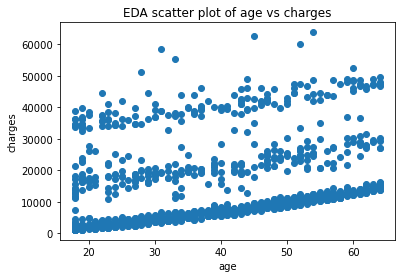

Text(0, 0.5, 'charges distribution')

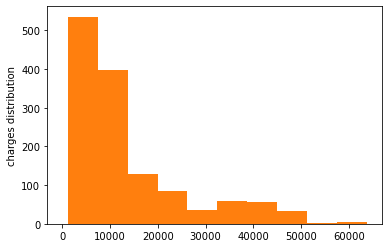

In [6]:


# Make scatter plot
plt.scatter(ex_regression['age'], ex_regression["charges"])
plt.title("EDA scatter plot of " + (' vs ').join(ex_regression.columns))
plt.xlabel('age')
plt.ylabel("charges")
plt.show()

# Make a histogram for `'age'`.
plt.hist(ex_regression['age'], bins = 10)
plt.ylabel('Count')

# Make a histogram for `charges`.
plt.hist(ex_regression["charges"], bins = 10)
plt.ylabel('charges distribution')





#### Task 6
##### Check the  number of NAs in `'age'` and `charges`.
##### Print the rows for each  variable that have NAs.
##### Impute the NAs with mean if needed.
#### Result:


In [7]:


# Check how many values are null in the charges column.
print(ex_regression["charges"].isnull().sum())

# Check how many values are null in the 'age' column.
print(ex_regression['age'].isnull().sum())

# If NA's are present in the dataset, inmpute using
# Set the DataFrame equal to the imputed dataset.
ex_regression = ex_regression.fillna(ex_regression.mean())





0
0


#### Task 7
##### Instantiate the `VarianceThreshold` function to look for low variance within the columns.
##### Name the cleaned dataset `ex_regression_clean` and check its dimensions.
#### Result:


In [8]:

# We instantiate the function.
ex_selector = VarianceThreshold()

ex_regression_clean = ex_selector.fit_transform(ex_regression)

# Check the dimensions of the cleaned dataset.
print(ex_regression_clean.shape)


(1337, 2)


#### Please refer to module 3 of SimpleRegression - SimpleLinear for Tasks 8-13
#### Task 8
##### Create two DataFrames, `X` and `Y` , with `X` having the independent variable `'age'`,
##### and `Y` the dependent variable `charges`.
##### Add the constant term for the intercept to `X`.
#### Result:


In [9]:


ex_X = pd.DataFrame(ex_regression_clean[:,1]) # independent variable

# Make sure to add the constant term so that we have a column for the intercept.
ex_X = sm.add_constant(ex_X)

ex_y = pd.DataFrame(ex_regression_clean[:,0]) # dependent variable




#### Task 9
##### Set the random seed to 1 using the `np.random.seed()` function.
##### Implement the linear model using `sm.OLS()`. Save the model to `ex_model`.
##### Print the model summary of `ex_model`.
#### Result:


In [10]:


# Build the model.
ex_model = sm.OLS(ex_y, ex_X).fit()
print(ex_model.summary())




                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     130.4
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           6.98e-29
Time:                        10:25:39   Log-Likelihood:                -5367.0
No. Observations:                1337   AIC:                         1.074e+04
Df Residuals:                    1335   BIC:                         1.075e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6283      0.544     63.612      0.0

#### Task 10
##### Add the linear model to the scatter plot we created before using `abline_plot`.
##### Implement the scatter plot. 
#### Result:


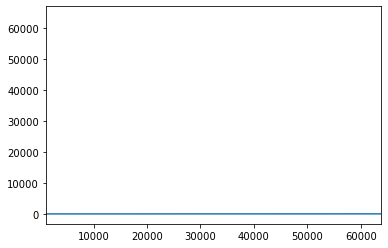

In [11]:


# Code to plot using matlplotlib.pyplot and statsmodel abline_plot.
fig = sm.graphics.abline_plot(model_results = ex_model)
ax = fig.axes[0]
plt.scatter(ex_regression['age'], ex_regression['charges'])
plt.show()




#### Task 11
##### Inspect the results of the model.
#### Result:


#### Task 12
##### Find the residual standard error of the model `ex_model`.
#### Result:


In [12]:

# Residual standard error
print(np.sqrt(ex_model.scale))




13.40990821342069


#### Task 13
##### What is the R-squared in our model? 
#### Result:


#### Please refer to module 4 of SimpleRegression - SimpleLinear for Tasks 14-20
#### Task 14
##### Find the fitted values from our linear model and save it to `ex_fitted`. Print its head.
##### Find the residuals similarly and save it to `ex_residuals`. 
#### Result:


In [13]:
ex_fitted = ex_model.fittedvalues
print(ex_fitted.head())

ex_residuals = ex_model.resid
print(ex_residuals.head())




0    40.469555
1    35.225219
2    36.167547
3    42.233727
4    35.965996
dtype: float64
0   -21.469555
1   -17.225219
2    -8.167547
3    -9.233727
4    -3.965996
dtype: float64


#### Task 15
##### Import `seaborn` package as `sns`.
##### Plot the residuals against the fitted values to test that the relationship between the predictor and response variable is linear.
#### Result:


C:\Users\624768\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>]

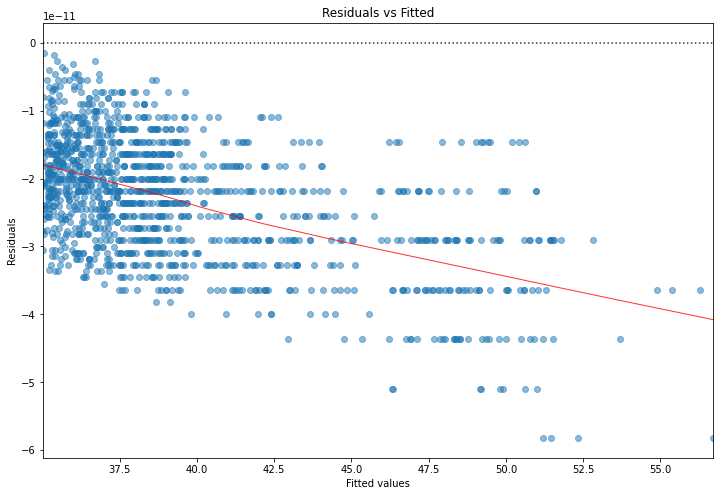

In [14]:


import seaborn as sns
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)
plot_lm_1.axes[0] = sns.residplot(ex_fitted, 'charges',
data = ex_regression, lowess = True, scatter_kws = {'alpha': 0.5},
                                line_kws = {'color':
                                          'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')
plot_lm_1.axes




#### Task 16
##### Test that the residuals are normally distributed.
##### Create a plot using `ProbPlot`.
#### Result:


C:\Users\624768\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0, 0.5, 'Standardized Residuals')

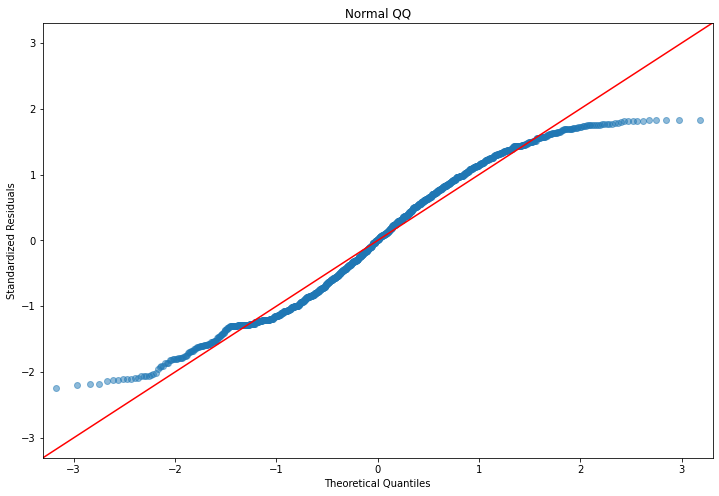

In [15]:


from statsmodels.graphics.gofplots import ProbPlot
model_norm_residuals = ex_model.get_influence().resid_studentized_internal
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line = '45', alpha = 0.5, color = '#4C72B0', lw = 1)
plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)
plot_lm_2.axes[0].set_title('Normal QQ')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')




#### Task 17
##### Test that the residuals have equal variance.
#### Result:


C:\Users\624768\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'sqrt(|Standardized Residuals|)')

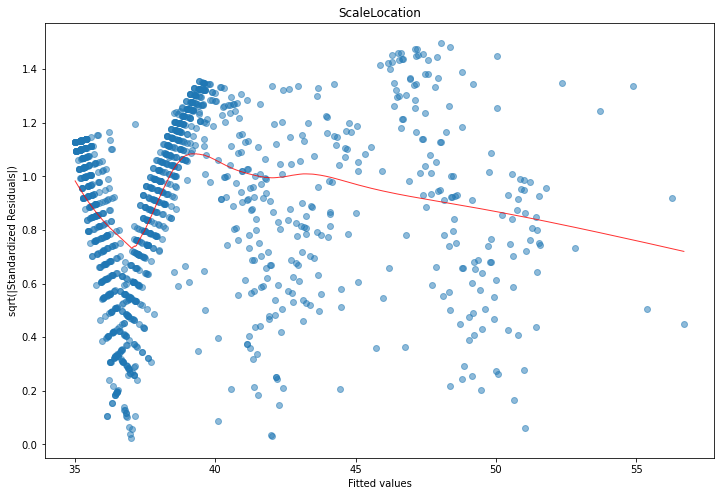

In [16]:

model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(ex_fitted, model_norm_residuals_abs_sqrt, alpha = 0.5)
sns.regplot(ex_fitted, model_norm_residuals_abs_sqrt,
            scatter = False,
            ci = False,
            lowess = True,
            line_kws = {'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_3.axes[0].set_title('ScaleLocation')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('sqrt(|Standardized Residuals|)')




#### Task 18
##### Test our data for outliers using `statsmodel.outlier_test()`. Save it to `ex_test`.
##### Save the final outliers to `ex_test_final`.
##### Remove the outliers from our original dataset and save the dataset as `ex_no_outliers`. 
##### Print the shape of the new dataset `ex_no_outliers`.
#### Result:


In [17]:

ex_test = ex_model.outlier_test()
print('Bad data points (bonf(p) < 0.05):')
print(ex_test[ex_test['bonf(p)'] < 0.05])

ex_test_final = ex_test[ex_test['bonf(p)'] < 0.05]
ex_no_outliers = ex_regression.drop(ex_test_final.index)

# Look at the shape of the new DataFrame, notice the number of rows have actually been dropped.
print(ex_no_outliers.shape)




Bad data points (bonf(p) < 0.05):
Empty DataFrame
Columns: [student_resid, unadj_p, bonf(p)]
Index: []
(1337, 2)


#### Task 19
##### Now try to rerun the model on this new dataset `ex_no_outliers`.
##### Once we slice a DataFrame, we cannot slice it again or change the values.
##### Hence, we separate the columns, `'age'` as `X2` and `charges` as `y2`, using the column names and convert it to a DataFrame.
#### Result:


In [18]:

print(ex_no_outliers.head())
print(ex_no_outliers.shape)
ex_X2 = ex_no_outliers['age']
ex_X2 = pd.DataFrame(ex_X2)
print(type(ex_X2))


# Make sure to add the constant term so that we have a column for the intercept.
ex_X2 = sm.add_constant(ex_X2)
ex_y2 = ex_no_outliers['charges']
ex_y2 = pd.DataFrame(ex_y2)

# Build the model.
ex_model2 = sm.OLS(ex_y2, ex_X2).fit()
print(ex_model2.summary())




   age      charges
0   19  16884.92400
1   18   1725.55230
2   28   4449.46200
3   33  21984.47061
4   32   3866.85520
(1337, 2)
<class 'pandas.core.frame.DataFrame'>
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     130.4
Date:                Mon, 22 Aug 2022   Prob (F-statistic):           6.98e-29
Time:                        10:25:41   Log-Likelihood:                -14405.
No. Observations:                1337   AIC:                         2.881e+04
Df Residuals:                    1335   BIC:                         2.882e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          

#### Task 20
##### Evaluate the new model `ex_model2`. Does this model perform better than the previous one?
#### Result:
